В этом блокноте мы научимся выполнять сглаживание и строить тренд временного ряда.

Для начала загрузим данные уже привычным нам образом

Постройте точечный график по исходным данным, а затем линейный и логарифмический тренды. Определите коэффициенты детерминации для трендов. В поля для ввода введите соответствующие значения, округленные до тысячных.

Введите коэффициент детерминации для линейного тренда:
Ответ округлите до тысячных.


In [ ]:
#!gdown 13b1Ty7mkrnAZ3WBYMCGQOhgrifUxGFl4

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_series = pd.read_csv('/Users/ekaterina/github_repos/ITMO_STUDY/Zadachi_ITMO_teorver_statistica/Data_for_exercise_3_task_2.csv',delimiter=';')

In [26]:
data_series

,Y
X,
1,2
2,15
3,15
4,33
5,33
...,...
196,85
197,93
198,104


В задании нумерация начинается с $1$, а у нас — с $0$. Исправим это, выполнив сдвиг индексов

In [27]:
#data_series.index += 1 
#data_series

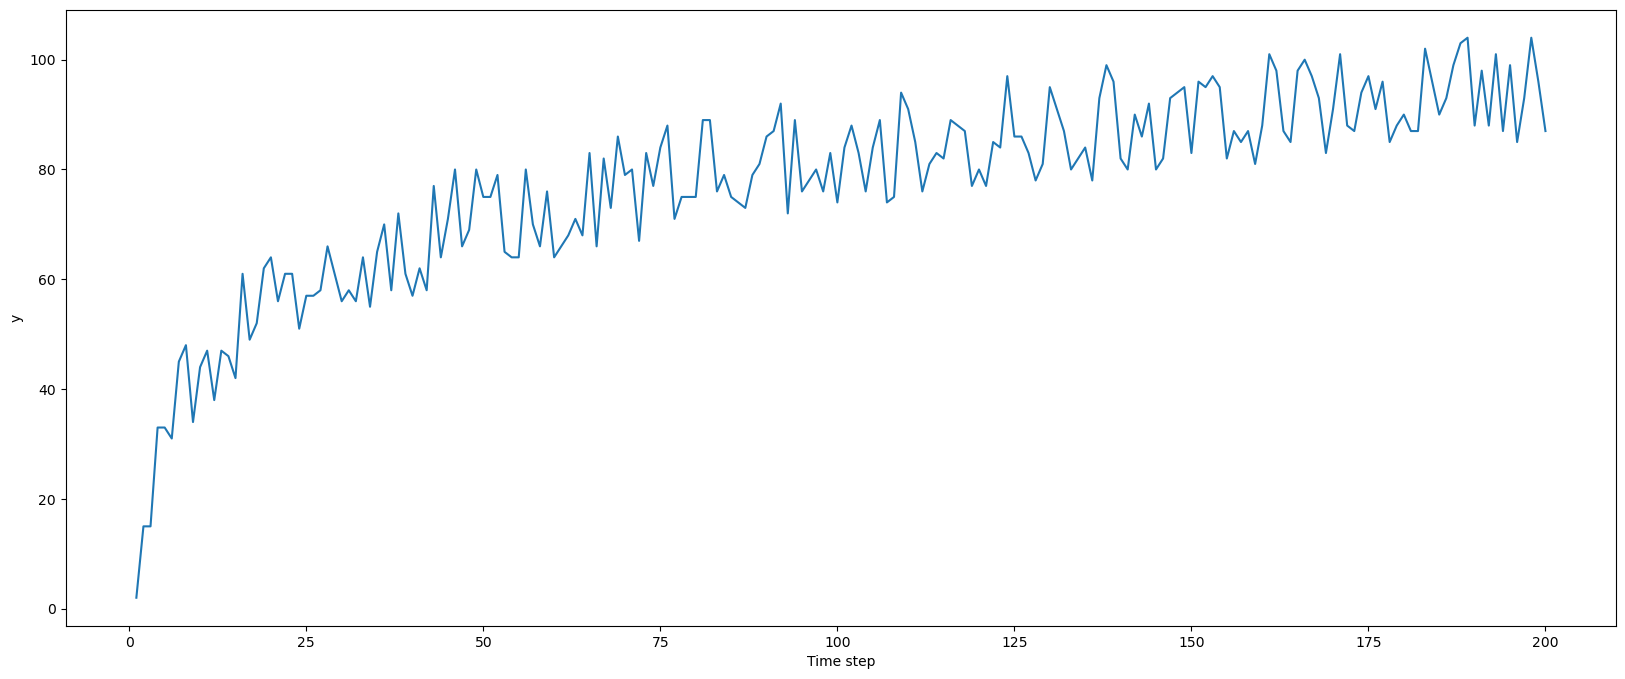

In [28]:
# Строим гр-к линейной функции
plt.figure(figsize=(20, 8))
plt.plot('Y', data = data_series)
plt.xlabel('Time step')
plt.ylabel('y')
plt.show()

In [29]:
import numpy as np
X = data_series.index.to_numpy()
y = data_series['Y'].to_numpy()
X

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [30]:
poly = np.polyfit(X, y, 1)
print(poly)

[ 0.25443561 51.59422111]


In [31]:
a = poly[0]
b = poly[1]

In [57]:
x = np.arange(1, 201)
data_series['lin_trend'] = a*x + b 

In [58]:
f_i = data_series['lin_trend']
y_avg = data_series['Y'].mean()

In [59]:
R2 = 1 - ((y - f_i) ** 2).sum() / ((y - y_avg) ** 2).sum()

In [60]:
round(R2, 3)

0.705

In [38]:
import math


Напишем функцию самостоятельно:

In [ ]:
def exponential_smoothing(series, alpha):
    result = [series[0]]
    for index in range(1, len(series)):
        result.append(alpha * series[index] + (1 - alpha) * result[index - 1]) 
    return result

Проведем сглаживание и запишем результат в столбец <code>y_exp_norm_user</code>

In [ ]:
data_series['y_exp_norm_user'] = exponential_smoothing(data_series['Y'].to_list(), 0.19)

In [ ]:
data_series

Построим графики исходного и сглаженного рядов

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot('Y', data = data_series)
plt.plot('y_exp_norm_user', data = data_series)
plt.xlabel('Time step')
plt.ylabel('y')
plt.show()

Выведем 50-ую строку нашего набора данных

In [ ]:
data_series.loc[[50]]

Выведем только 50-ое сглаженное значение

In [ ]:
data_series['y_exp_norm_user'].loc[[50]]

Округлим его до сотых

In [ ]:
y50 = data_series['y_exp_norm_user'].loc[[50]]
round(y50, 2)

Теперь проведем экспоненциальное сглаживание нашего временного ряда, используя [функцию](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html) <code>ewm</code>. Результат запишем в новый столбец <code>y_exp_norm</code>

In [ ]:
data_series['y_exp_norm'] = data_series['Y'].ewm(alpha=0.19, adjust=False).mean()

In [ ]:
data_series

Построим графики исходного и сглаженного рядов

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot('Y', data = data_series)
plt.plot('y_exp_norm', data = data_series)
plt.plot('y_exp_norm_user', data = data_series)
plt.xlabel('Time step')
plt.ylabel('y')
plt.show()

Рассмотрим отдельно значения временного ряда и соответсвующие им временные метки. Преобразуем тип данных в массив <code>numpy</code>:

In [ ]:
import numpy as np
X = data_series.index.to_numpy()
y = data_series['Y'].to_numpy()
X

Найдем уравнение линейного тренда, используя функцию <code>polyfit</code>

In [46]:
poly = np.polyfit(X, y, 1)
print(poly)

[ 0.25443561 51.59422111]


In [47]:
a = poly[0]
b = poly[1]

Найдем значения ряда, используя уравнение тренда

In [48]:
x = np.arange(1, 201)
data_series['lin_trend'] = a * x + b

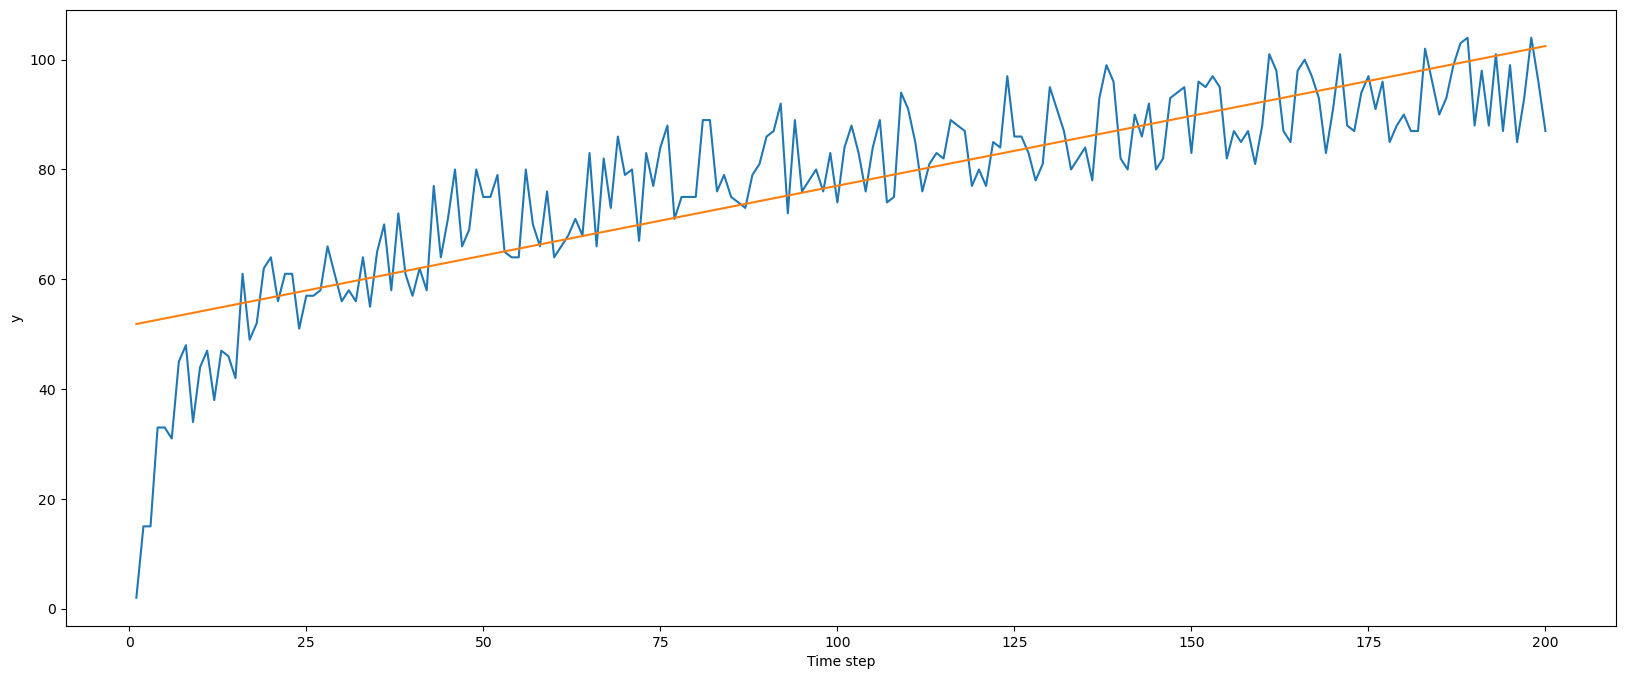

In [49]:
plt.figure(figsize=(20, 8))
plt.plot('Y', data=data_series)
plt.plot('lin_trend', data=data_series)
plt.xlabel('Time step')
plt.ylabel('y')
plt.show()

Вычислим коэффициент [детерминации](http://statistica.ru/theory/koeffitsient-determinatsii-i-lineynaya-regressiya/)

$R^{2}=1-\frac{\sum\limits_{i=1}^{n}\left(y_{i}-f_{i}\right)^{2}}{\sum\limits_{i=1}^{n}\left(y_{i}-y_{\mathrm{avg}}\right)^{2}}$

In [50]:
f_i = data_series['lin_trend']
y_avg = data_series['Y'].mean()

In [51]:
R2 = 1 - ((y - f_i) ** 2).sum() / ((y - y_avg) ** 2).sum()

In [52]:
round(R2, 3)

0.705

In [132]:
lf=np.polyfit(np.log(x), y, 2)
print(lf)

[ 0.1465654  16.18123044  4.46096336]


In [144]:
a_l = poly[-1]
b_l = poly[0]
c_l = poly[1]

In [146]:
data_series['log_trend']=a_l*np.log(b_l)*x+c_l

In [147]:
R2_l = 1 - ((y - data_series['log_trend']) ** 2).sum() / ((y - y_avg) ** 2).sum()

In [148]:
round(R2_l, 3)

-220295.408

логарифмическая ф-ия построена неверно, ответ не сходится

Спрогнозируем $101$-ый член ряда

In [ ]:
y_201 = a * 201 + b
round(y_201, 0)

# Про SMA

In [ ]:
def SMA_smoothing(series, width):
    result = []
    k = (width - 1) // 2
    for index in range(k, len(series) - k):
        result.append(np.sum(series[index - k : index + k + 1])/width) 
    return result

In [ ]:
series = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/3dc23e88377eb5729d54221ced9f683b/asset-v1:ITMOUniversity+DATANTECH2035+summer_2022_1+type@asset+block/quiz_5_2_2_data.csv',
                     header=None)
series = series.set_index(0)

In [ ]:
series.head()

In [ ]:
smoothed = pd.DataFrame(SMA_smoothing(series[1].to_list(),3))
smoothed.index += 1
smoothed.head()

In [ ]:
smoothed = pd.DataFrame(SMA_smoothing(series[1].to_list(),7))
smoothed.index += 1
smoothed.head()

In [ ]:
smoothed = series.rolling(window=7).mean()
smoothed